In [67]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [68]:
df = pd.read_csv("data.csv")
df

,species,item,ability,type1,type2,move1,move2,move3,move4,won,strategy
0,Vikavolt,Heavy-Duty Boots,Levitate,Bug,Electric,Sticky Web,Roost,Thunderbolt,Energy Ball,True,best
1,Tyranitar,Lum Berry,Sand Stream,Rock,Dark,Dragon Dance,Crunch,Fire Punch,Stone Edge,True,best
2,Rotom-Heat,Heavy-Duty Boots,Levitate,Electric,Fire,Thunderbolt,Nasty Plot,Will-O-Wisp,Overheat,True,best
3,Linoone,Wiki Berry,Gluttony,Normal,NaN,Belly Drum,Extreme Speed,Throat Chop,Stomping Tantrum,True,best
4,Blacephalon,Heavy-Duty Boots,Beast Boost,Fire,Ghost,Psyshock,Fire Blast,Shadow Ball,Calm Mind,True,best
...,...,...,...,...,...,...,...,...,...,...,...
1167427,Shiftry,Life Orb,Chlorophyll,Grass,Dark,Dark Pulse,Leaf Storm,Nasty Plot,Heat Wave,False,best
1167428,Terrakion,Life Orb,Justified,Rock,Fighting,Close Combat,Stone Edge,Earthquake,Swords Dance,False,best
1167429,Inteleon,Choice Specs,Torrent,Water,NaN,U-turn,Dark Pulse,Hydro Pump,Ice Beam,False,best
1167430,Zamazenta,Choice Band,Dauntless Shield,Fighting,NaN,Crunch,Wild Charge,Close Combat,Psychic Fangs,False,best


In [69]:
countBySpecies = df.groupby(["species"]).apply(lambda el: len(el)).reset_index(name="count")
countBySpecies

,species,count
0,Abomasnow,1817
1,Absol,3403
2,Accelgor,1813
3,Aegislash,3394
4,Aerodactyl,3260
...,...,...
451,Zekrom,3256
452,Zeraora,3245
453,Zoroark,2564
454,Zygarde,3285


<AxesSubplot: xlabel='species', ylabel='count'>

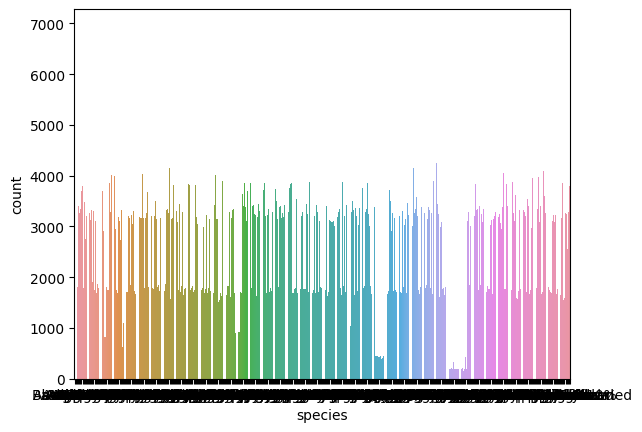

In [70]:
g1 = sns.barplot(countBySpecies, x="species", y="count")
g1

In [71]:
byT1 = df.groupby(["type1", "won"]).apply(lambda el: len(el)).reset_index(name="count").rename(columns={"type1":"type"})
byT2 = df.groupby(["type2", "won"]).apply(lambda el: len(el)).reset_index(name="count").rename(columns={"type2":"type"})
byT = pd.concat([byT1, byT2]).groupby(["type", "won"])["count"].apply(sum).reset_index()
byT

,type,won,count
0,Bug,False,36967
1,Bug,True,36616
2,Dark,False,45912
3,Dark,True,44324
4,Dragon,False,61344
5,Dragon,True,65496
6,Electric,False,49570
7,Electric,True,52635
8,Fairy,False,49341
9,Fairy,True,49166


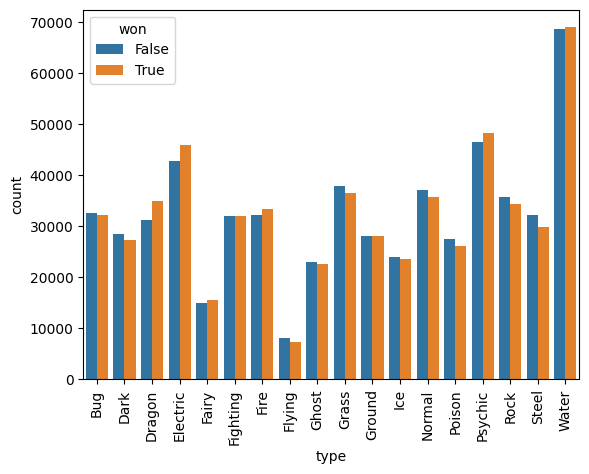

In [72]:
g2 = sns.barplot(byT1, x="type", y="count", hue="won")
plt.setp(g2.get_xticklabels(), rotation=90);

In [73]:
byTP = byT.pivot(index="type", columns="won", values="count").reset_index()
byTP.columns = byTP.columns.map(str)
byTP = byTP.rename(columns={"False":"lossCount", "True":"winCount"}).rename_axis(None, axis=1)
byTP["winRatio"] = byTP["winCount"]/(byTP["winCount"] + byTP["lossCount"])
byTP

,type,lossCount,winCount,winRatio
0,Bug,36967,36616,0.497615
1,Dark,45912,44324,0.491201
2,Dragon,61344,65496,0.516367
3,Electric,49570,52635,0.514994
4,Fairy,49341,49166,0.499112
5,Fighting,54385,55672,0.505847
6,Fire,44834,45575,0.504098
7,Flying,73254,71720,0.494709
8,Ghost,44800,44041,0.495728
9,Grass,49047,47802,0.493572


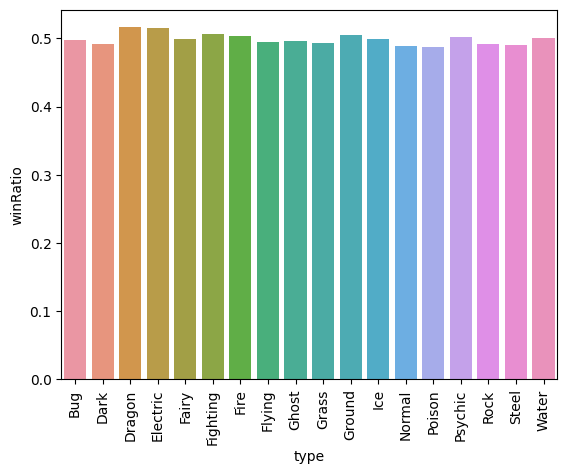

In [118]:
g3 = sns.barplot(byTP, x="type", y="winRatio")
plt.setp(g3.get_xticklabels(), rotation=90);
# g3.figure.savefig("figs/winByType.png")
plt.savefig("figs/winByType.png",bbox_inches='tight')


In [79]:
import re
def fun(x):
    x = x.lower()
    x  = re.sub('[^0-9a-zA-Z]+', '', x)
    return x



In [80]:
tmp = df.groupby(["species", "won"]).apply(lambda el: len(el)).reset_index(name="count")
winrateBySpeciesAI = tmp.pivot(index="species", columns="won", values="count").reset_index()
winrateBySpeciesAI.columns = winrateBySpeciesAI.columns.map(str)
winrateBySpeciesAI = winrateBySpeciesAI.rename(columns={"False":"lossCount", "True":"winCount"}).rename_axis(None, axis=1)
winrateBySpeciesAI["winRatio"] = winrateBySpeciesAI["winCount"]/(winrateBySpeciesAI["winCount"] + winrateBySpeciesAI["lossCount"])


winrateBySpeciesAI["speciesLower"] = winrateBySpeciesAI["species"].apply(fun)
winrateBySpeciesAI

,species,lossCount,winCount,winRatio,speciesLower
0,Abomasnow,1000,817,0.449642,abomasnow
1,Absol,1792,1611,0.473406,absol
2,Accelgor,914,899,0.495863,accelgor
3,Aegislash,1877,1517,0.446965,aegislash
4,Aerodactyl,1564,1696,0.520245,aerodactyl
...,...,...,...,...,...
450,Zekrom,1470,1786,0.548526,zekrom
451,Zeraora,1477,1768,0.544838,zeraora
452,Zoroark,1334,1230,0.479719,zoroark
453,Zygarde,1433,1852,0.563775,zygarde


In [92]:
gen8df = pd.read_csv("gen8randombattle-1500.csv")
gen8df["speciesLower"] = gen8df["Pokemon"].apply(fun)
gen8df["Winrate"] = gen8df["Winrate"].apply(lambda x:x/100)
gen8df

,Rank,Pokemon,Deviations,Winrate,Games,Wins,speciesLower
0,1,Nihilego,7.021526,0.525154,19480,10230,nihilego
1,2,Mewtwo,6.463560,0.524205,17827,9345,mewtwo
2,3,Inteleon,6.325944,0.523320,18396,9627,inteleon
3,4,Blacephalon,6.324703,0.523096,18748,9807,blacephalon
4,5,Urshifu,6.255685,0.521862,20469,10682,urshifu
...,...,...,...,...,...,...,...
435,436,Clawitzer,6.587644,0.476990,20491,9774,clawitzer
436,437,Maractus,6.873110,0.466354,10432,4865,maractus
437,438,Indeedee,7.148806,0.475779,21779,10362,indeedee
438,439,Audino,7.152256,0.472703,17163,8113,audino


In [93]:
allW = winrateBySpeciesAI.merge(gen8df, on="speciesLower")
allW

,species,lossCount,winCount,winRatio,speciesLower,Rank,Pokemon,Deviations,Winrate,Games,Wins
0,Abomasnow,1000,817,0.449642,abomasnow,280,Abomasnow,1.063614,0.494858,10696,5293
1,Absol,1792,1611,0.473406,absol,291,Absol,1.307022,0.495307,19390,9604
2,Accelgor,914,899,0.495863,accelgor,333,Accelgor,2.170156,0.489488,10654,5215
3,Aegislash,1877,1517,0.446965,aegislash,51,Aegislash,3.776870,0.513743,18883,9701
4,Aerodactyl,1564,1696,0.520245,aerodactyl,116,Aerodactyl,2.088374,0.507733,18234,9258
...,...,...,...,...,...,...,...,...,...,...,...
434,Zekrom,1470,1786,0.548526,zekrom,228,Zekrom,0.100630,0.499638,19354,9670
435,Zeraora,1477,1768,0.544838,zeraora,109,Zeraora,2.141853,0.507882,18459,9375
436,Zoroark,1334,1230,0.479719,zoroark,319,Zoroark,1.888839,0.492409,15479,7622
437,Zygarde,1433,1852,0.563775,zygarde,157,Zygarde,1.301818,0.504682,19331,9756


In [94]:
import numpy as np
player_winrates = allW["Winrate"]
ai_winrates = allW["winRatio"]
np.cov(player_winrates, ai_winrates)[0][1]

0.00023198297631141457

In [101]:
allW[['Winrate','winRatio']].corr(method="spearman" )

,Winrate,winRatio
Winrate,1.000000,0.488765
winRatio,0.488765,1.000000


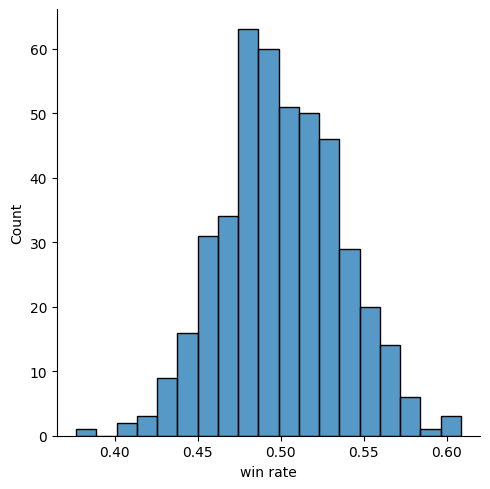

In [114]:
ax = sns.displot(allW, x="winRatio")
ax.set(xlabel='win rate')
ax.figure.savefig("figs/winDistrAI.png")

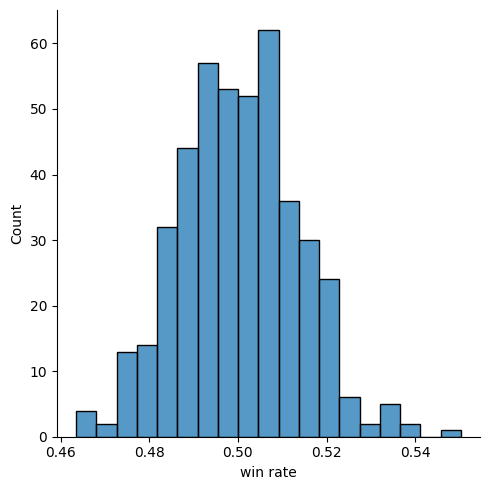

In [115]:
ax = sns.displot(allW, x="Winrate", )
ax.set(xlabel='win rate')
ax.figure.savefig("figs/winDistrPlayer.png")

In [106]:
winrateBySpeciesAI.sort_values(by=['winRatio'], ascending=False)

,species,lossCount,winCount,winRatio,speciesLower
439,Xerneas,1264,1965,0.608548,xerneas
302,Regidrago,1214,1807,0.598146,regidrago
93,Dragonite,1243,1843,0.597213,dragonite
160,Haxorus,1579,2271,0.589870,haxorus
328,Sawk,698,975,0.582785,sawk
...,...,...,...,...,...
9,Amoonguss,2000,1473,0.424129,amoonguss
68,Corsola,1048,757,0.419391,corsola
322,Sableye,1078,759,0.413174,sableye
403,Toxapex,1859,1249,0.401866,toxapex


In [107]:
gen8df.sort_values(by=['Winrate'], ascending=False)

,Rank,Pokemon,Deviations,Winrate,Games,Wins,speciesLower
59,60,SilvallyDragon,3.472793,0.550251,1194,657,silvallydragon
81,82,SilvallyGrass,2.724925,0.539496,1190,642,silvallygrass
89,90,SilvallyWater,2.532990,0.539122,1048,565,silvallywater
95,96,Silvally,2.334320,0.535849,1060,568,silvally
93,94,SilvallyElectric,2.391170,0.534864,1176,629,silvallyelectric
...,...,...,...,...,...,...,...
431,432,Sudowoodo,6.023040,0.470650,10528,4955,sudowoodo
434,435,Wobbuffet,6.429304,0.468056,10127,4740,wobbuffet
390,391,Calyrex,3.782869,0.467770,3444,1611,calyrex
436,437,Maractus,6.873110,0.466354,10432,4865,maractus
